In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

### Removing Stop-words, Punctuation, Numbers

In [2]:
#Load Aljazeera
with open('aljazeera-khashoggi.txt') as f:
    aljazeera = f.read()

In [3]:
#load BBC
with open('BBC-khashoggi.txt') as f:
    BBC = f.read()

In [4]:
#load Breitbart
with open('breitbart-khashoggi.txt', encoding='utf8') as f:
    breitbart = f.read()

In [5]:
#Load Fox
with open('fox-khashoggi.txt', encoding='utf8') as f:
    fox = f.read()

In [6]:
#Load CNN
with open('cnn-khashoggi.txt') as f:
    cnn = f.read()

In [7]:
#convert the stop-words csv to a list
stopwords = pd.read_csv("stop_words.csv")
stopwordsl=stopwords['word'].to_list()

In [8]:
docs = [aljazeera, BBC, breitbart, fox, cnn]

In [9]:
#note: I decided to get rid of stop-words, numbers, and punctuation  
def tokenize(text=None):
    '''
    clean the strings: replace punctuation and numbers + remove stop-words
    '''
    text = text.lower()
    text = text.replace('.','')
    text = text.replace(')','')
    text = text.replace('(','')
    text = text.replace('"','')
    text = text.replace('"','')
    text = text.replace("”", "")
    text = text.replace("“", "")
    text = text.replace('[','')
    text = text.replace(",", "")
    text = text.replace(']','')
    text = text.replace('/','')
    text = text.replace('\'','')
    text = text.replace('.','')
    text = text.replace('!','')
    text = text.replace('?','')
    text = text.replace("$", "")
    text = text.replace('-','')
    text = text.replace('','')
    text = text.replace(':','')
    text = text.replace('0','')
    text = text.replace('1','')
    text = text.replace('2','')
    text = text.replace('3','')
    text = text.replace('4','')
    text = text.replace('5','')
    text = text.replace('6','')
    text = text.replace('7','')
    text = text.replace('8','')
    text = text.replace('9','')
    text_list = text.split()
    text_list2 = [word for word in text_list if word not in stopwordsl]
    return text_list2

print(tokenize(docs[0]))
print(tokenize(docs[1]))
print(tokenize(docs[2]))
print(tokenize(docs[3]))
print(tokenize(docs[4]))

['turkey', 'istanbul', 'turkish', 'president', 'recep', 'tayyip', 'erdogan', 'murder', 'journalist', 'jamal', 'khashoggi', 'kingdoms', 'consulate', 'istanbul', 'planned', 'saudi', 'officials', 'days', 'advance', 'addressing', 'legislators', 'justice', 'development', 'party', 'ak', 'party', 'tuesday', 'erdogan', 'detailed', 'khashoggis', 'disappearance', 'murder', 'stopped', 'short', 'accusing', 'saudi', 'royals', 'savage', 'killing', 'caused', 'global', 'outrage', 'september', 'khashoggi', 'arrived', 'saudi', 'arabian', 'consulate', 'sort', 'wedding', 'paperwork', 'erdogan', 'speech', 'turkish', 'parliament', 'capital', 'ankara', 'time', 'saudi', 'arabian', 'officials', 'started', 'plan', 'roadmap', 'murder', 'added', 'saudi', 'officials', 'left', 'turkey', 'travelled', 'saudi', 'arabia', 'indicating', 'planned', 'murder', 'khashoggi', 'washington', 'post', 'columnist', 'critic', 'powerful', 'saudi', 'crown', 'prince', 'mohammed', 'bin', 'salman', 'disappeared', 'entering', 'saudi', 'c

In [10]:
def convert_text_to_dtm(txt):
    '''
    Converts text into a document term matrix.
    '''
    d = dict()
    for word in tokenize(txt):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [11]:
def gen_DTM(texts=None):
    '''
    Generate a document term matrix
    '''
    DTM = pd.DataFrame()
    for text in texts:
        entry = convert_text_to_dtm(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM

In [12]:
#create arrays for each source
DF = gen_DTM(docs)
alj_array= DF.iloc[0].values
BBC_array= DF.iloc[1].values
breitbart_array= DF.iloc[2].values
fox_array= DF.iloc[3].values
cnn_array= DF.iloc[4].values

In [13]:
#show the dataframe
DF

,abdulaziz,absent,accident,accidentally,accidentallyerdogan,account,accounts,accusation,accusing,acknowledged,...,withheld,woods,world,worse,writer,yalova,yearold,yelova,â£bn,—
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,3.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
#create MY OWN function for creating cosine 
def cosine_func(v, u):
    """
    v = vector v
    u = vector u
    cosine = compute the angle between vectors v and u
    
    """
    cosine = np.dot(v,u)/(np.sqrt(np.dot(v,v)) * np.sqrt(np.dot(u,u)))
    return cosine

In [15]:
#Cosine combos for Aljazeera
Cosine_Aljazeera_BBC = cosine_func(alj_array, BBC_array)
Cosine_Aljazeera_Breitbart = cosine_func(alj_array, breitbart_array)
Cosine_Aljazeera_CNN = cosine_func(alj_array, cnn_array)
Cosine_Aljazeera_fox = cosine_func(alj_array, fox_array)

In [16]:
#Cosine combos for BBC
Cosine_BBC_CNN = cosine_func(BBC_array, cnn_array)
Cosine_BBC_Fox = cosine_func(BBC_array, fox_array)
Cosine_BBC_Breitbart = cosine_func(BBC_array, breitbart_array)

In [17]:
#Cosine combos for Breitart
Cosine_Breitbart_CNN = cosine_func(breitbart_array, cnn_array)
Cosine_Breitbart_Fox = cosine_func(breitbart_array, fox_array)

In [18]:
#Cosine combos for CNN
Cosine_CNN_Fox = cosine_func(cnn_array, fox_array)

In [19]:
#dataframe for all?
All_Cosine_Dict = {
    "Cosine_Aljazeera_BBC" : [Cosine_Aljazeera_BBC],
    "Cosine_Aljazeera_Breitbart" : [Cosine_Aljazeera_Breitbart],
    "Cosine_Aljazeera_CNN" : [Cosine_Aljazeera_CNN],
    "Cosine_Aljazeera_fox" : [Cosine_Aljazeera_fox],
    "Cosine_BBC_CNN" : [Cosine_BBC_CNN],
    "Cosine_BBC_Fox" : [Cosine_BBC_Fox],
    "Cosine_BBC_Breitbart" : [Cosine_BBC_Breitbart],
    "Cosine_Breitbart_CNN" : [Cosine_Breitbart_CNN],
    "Cosine_Breitbart_Fox" : [Cosine_Breitbart_Fox],
    "Cosine_CNN_Fox" : [Cosine_CNN_Fox],
}

In [20]:
#convert dictionary to Dataframe
All_Cosine_DF = pd.DataFrame(All_Cosine_Dict)

#add row
Value = ['Cosine']
All_Cosine_DF['Value'] = Value

#plot the dataframe
All_Cosine_DF

,Cosine_Aljazeera_BBC,Cosine_Aljazeera_Breitbart,Cosine_Aljazeera_CNN,Cosine_Aljazeera_fox,Cosine_BBC_CNN,Cosine_BBC_Fox,Cosine_BBC_Breitbart,Cosine_Breitbart_CNN,Cosine_Breitbart_Fox,Cosine_CNN_Fox,Value
0,0.679561,0.587747,0.53299,0.682478,0.502923,0.629768,0.583276,0.368376,0.548878,0.518818,Cosine


<AxesSubplot:xlabel='Value'>

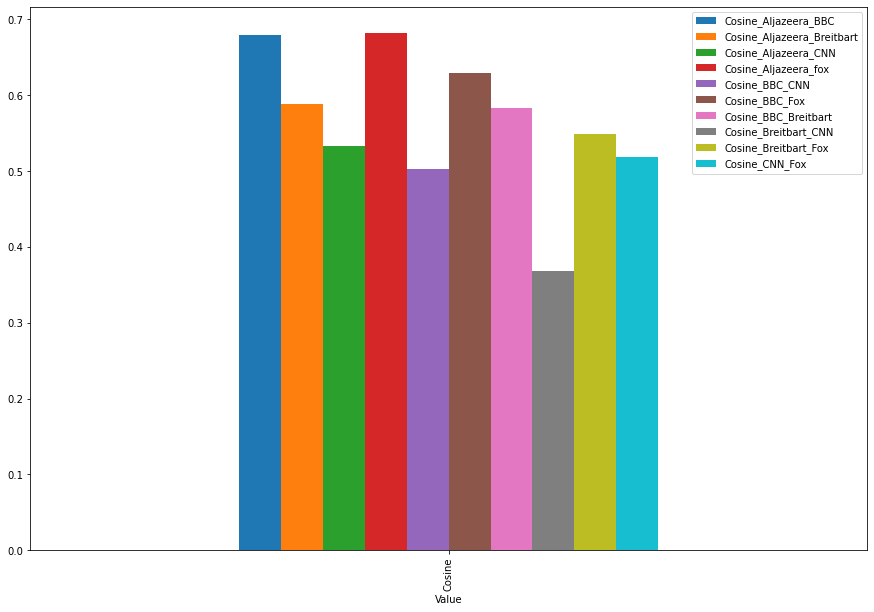

In [21]:
#plot each relationship
All_Cosine_DF.plot(x='Value', y= ['Cosine_Aljazeera_BBC', 'Cosine_Aljazeera_Breitbart', "Cosine_Aljazeera_CNN", "Cosine_Aljazeera_fox", "Cosine_BBC_CNN", "Cosine_BBC_Fox", "Cosine_BBC_Breitbart", "Cosine_Breitbart_CNN", "Cosine_Breitbart_Fox", "Cosine_CNN_Fox"], kind='bar', figsize=(15,10))

### Only Removing Punctuation, Numbers

In [22]:
def tokenize1(text=None):
    '''
    clean the strings: replace punctuation and numbers
    '''
    text = text.lower()
    text = text.replace('.','')
    text = text.replace(')','')
    text = text.replace('(','')
    text = text.replace('"','')
    text = text.replace('"','')
    text = text.replace("”", "")
    text = text.replace("“", "")
    text = text.replace('[','')
    text = text.replace(",", "")
    text = text.replace(']','')
    text = text.replace('/','')
    text = text.replace('\'','')
    text = text.replace('.','')
    text = text.replace('!','')
    text = text.replace('?','')
    text = text.replace("$", "")
    text = text.replace('-','')
    text = text.replace('','')
    text = text.replace(':','')
    text = text.replace('0','')
    text = text.replace('1','')
    text = text.replace('2','')
    text = text.replace('3','')
    text = text.replace('4','')
    text = text.replace('5','')
    text = text.replace('6','')
    text = text.replace('7','')
    text = text.replace('8','')
    text = text.replace('9','')
    text_list = text.split()
    return text_list

print(tokenize1(docs[0]))
print(tokenize1(docs[1]))
print(tokenize1(docs[2]))
print(tokenize1(docs[3]))
print(tokenize1(docs[4]))

['turkey', 'istanbul', 'turkish', 'president', 'recep', 'tayyip', 'erdogan', 'has', 'said', 'the', 'murder', 'of', 'journalist', 'jamal', 'khashoggi', 'at', 'the', 'kingdoms', 'consulate', 'in', 'istanbul', 'was', 'planned', 'by', 'saudi', 'officials', 'days', 'in', 'advance', 'addressing', 'legislators', 'from', 'his', 'justice', 'and', 'development', 'party', 'ak', 'party', 'on', 'tuesday', 'erdogan', 'detailed', 'khashoggis', 'disappearance', 'and', 'murder', 'but', 'stopped', 'short', 'of', 'accusing', 'saudi', 'royals', 'of', 'the', 'savage', 'killing', 'that', 'has', 'caused', 'global', 'outrage', 'on', 'september', 'khashoggi', 'arrived', 'at', 'the', 'saudi', 'arabian', 'consulate', 'for', 'him', 'to', 'sort', 'out', 'his', 'wedding', 'paperwork', 'erdogan', 'said', 'during', 'the', 'speech', 'in', 'the', 'turkish', 'parliament', 'in', 'the', 'capital', 'ankara', 'it', 'seems', 'that', 'at', 'that', 'time', 'they', 'saudi', 'arabian', 'officials', 'started', 'to', 'plan', 'a', 

In [23]:
def convert_text_to_dtm1(txt):
    '''
    Converts text into a document term matrix.
    '''
    d = dict()
    for word in tokenize1(txt):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [24]:
def gen_DTM1(texts=None):
    '''
    Generate a document term matrix
    '''
    DTM = pd.DataFrame()
    for text in texts:
        entry = convert_text_to_dtm1(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM

In [25]:
#create arrays for each source
DF1 = gen_DTM1(docs)
alj_array1= DF1.iloc[0].values
BBC_array1= DF1.iloc[1].values
breitbart_array1= DF1.iloc[2].values
fox_array1= DF1.iloc[3].values
cnn_array1= DF1.iloc[4].values

In [26]:
DF1

,a,abdulaziz,able,about,absent,accident,accidentally,accidentallyerdogan,according,account,...,worse,would,writer,yalova,yearold,yelova,yet,your,â£bn,—
0,11,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,0.0,0.0,2,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,4.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
2,11,2.0,0.0,2,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,14,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
4,14,0.0,1.0,1,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
#Cosine combos for Aljazeera
Cosine_Aljazeera_BBC1 = cosine_func(alj_array1, BBC_array1)
Cosine_Aljazeera_Breitbart1 = cosine_func(alj_array1, breitbart_array1)
Cosine_Aljazeera_CNN1 = cosine_func(alj_array1, cnn_array1)
Cosine_Aljazeera_fox1 = cosine_func(alj_array1, fox_array1)

In [28]:
#Cosine combos for BBC
Cosine_BBC_CNN1 = cosine_func(BBC_array1, cnn_array1)
Cosine_BBC_Fox1 = cosine_func(BBC_array1, fox_array1)
Cosine_BBC_Breitbart1 = cosine_func(BBC_array1, breitbart_array1)

In [29]:
#Cosine combos for Breitart
Cosine_Breitbart_CNN1 = cosine_func(breitbart_array1, cnn_array1)
Cosine_Breitbart_Fox1 = cosine_func(breitbart_array1, fox_array1)

In [30]:
#Cosine combos for CNN
Cosine_CNN_Fox1 = cosine_func(cnn_array1, fox_array1)

In [31]:
All_Cosine_Dict1 = {
    "Cosine_Aljazeera_BBC1" : [Cosine_Aljazeera_BBC1],
    "Cosine_Aljazeera_Breitbart1" : [Cosine_Aljazeera_Breitbart1],
    "Cosine_Aljazeera_CNN1" : [Cosine_Aljazeera_CNN1],
    "Cosine_Aljazeera_fox1" : [Cosine_Aljazeera_fox1],
    "Cosine_BBC_CNN1" : [Cosine_BBC_CNN1],
    "Cosine_BBC_Fox1" : [Cosine_BBC_Fox1],
    "Cosine_BBC_Breitbart1" : [Cosine_BBC_Breitbart1],
    "Cosine_Breitbart_CNN1" : [Cosine_Breitbart_CNN1],
    "Cosine_Breitbart_Fox1" : [Cosine_Breitbart_Fox1],
    "Cosine_CNN_Fox1" : [Cosine_CNN_Fox1],
}

In [32]:
#convert dictionary to Dataframe
All_Cosine_DF_Including_SW = pd.DataFrame(All_Cosine_Dict1)

#add row
Value = ['Cosine']
All_Cosine_DF_Including_SW['Value'] = Value

#plot the dataframe
All_Cosine_DF_Including_SW

,Cosine_Aljazeera_BBC1,Cosine_Aljazeera_Breitbart1,Cosine_Aljazeera_CNN1,Cosine_Aljazeera_fox1,Cosine_BBC_CNN1,Cosine_BBC_Fox1,Cosine_BBC_Breitbart1,Cosine_Breitbart_CNN1,Cosine_Breitbart_Fox1,Cosine_CNN_Fox1,Value
0,0.871053,0.837733,0.734947,0.842531,0.744003,0.887269,0.897211,0.679386,0.867841,0.737182,Cosine


<AxesSubplot:xlabel='Value'>

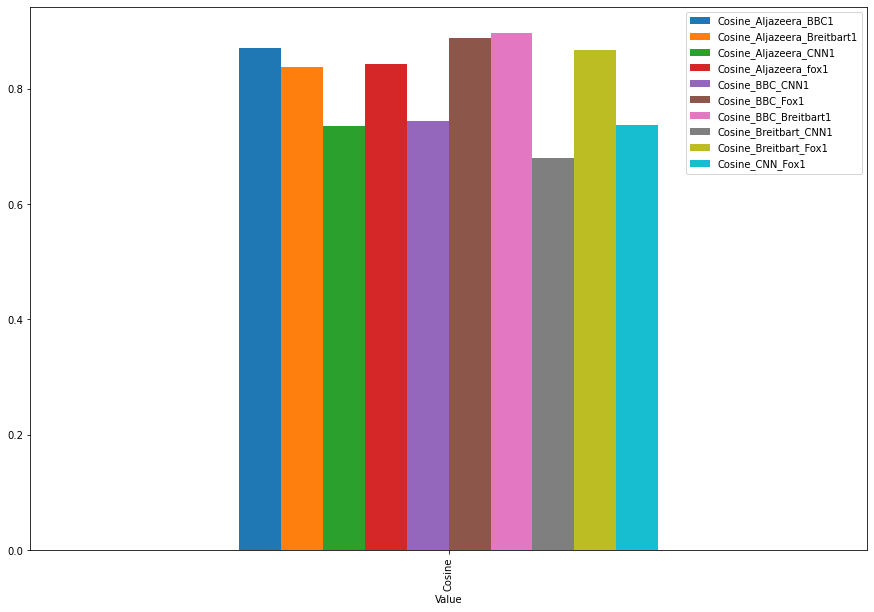

In [33]:
#plot each relationship
All_Cosine_DF_Including_SW.plot(x='Value', y= ['Cosine_Aljazeera_BBC1', 'Cosine_Aljazeera_Breitbart1', "Cosine_Aljazeera_CNN1", "Cosine_Aljazeera_fox1", "Cosine_BBC_CNN1", "Cosine_BBC_Fox1", "Cosine_BBC_Breitbart1", "Cosine_Breitbart_CNN1", "Cosine_Breitbart_Fox1", "Cosine_CNN_Fox1"], kind='bar', figsize=(15,10))

### Write-up:

After removing stop-words, punctuation, and numbers, the five articles still present the information through roughly similar language. The largest exception to this pattern is the relationship betwen Breitbart and CNN, which score a cosine similarity score of roughly .37. In contrast, the two strongest relationships were between Aljazeera and BBC, and Aljazeera and Fox. 

Altogether, this tells us that when stop-words, punctuation, and numbers are removed, Aljazeera/BBC and Aljazeera/Fox wrote most similar to one another with regard to the Kashoggi scandal. On the flipside, Breitbart/CNN wrote in the least similar manner. 

When only punctuation and numbers were removed, all relationships become significantly stronger. However, the new groupings maintain an ordinal relationship to the original. Specifically, while Breitbart and CNN now appear significantly more similar, the relationship maintains the lowest cosine similarity score. Further, the inclusion of stop-words artificially inflates each relationship.